In [2]:
!pip install pandas


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install openpyxl


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np

data = pd.read_excel("OSA_extreme_male_Gemini.xlsx")

print("Shape:", data.shape)
print(data.head())
print(data.columns)

Shape: (278, 9)
  Patient  Gender   IAH  Weight  Height  Age  Cervical        BMI      OSA
0   P0005  hombre   9.0      80     173   32        40  26.729927  Healthy
1   P0006  hombre   2.0     109     190   32        42  30.193906  Healthy
2   P0007  hombre  34.0      86     169   39        42  30.110991   Severe
3   P0008  hombre  60.0     145     172   47        44  49.012980   Severe
4   P0013  hombre   3.7      90     180   36        40  27.777778  Healthy
Index(['Patient', 'Gender', 'IAH', 'Weight', 'Height', 'Age', 'Cervical',
       'BMI', 'OSA'],
      dtype='object')


In [5]:
# ===== Classification (FIXED LABELS) =====
feat_cols = ["Age","Height","Weight","BMI","Cervical"]

X_clf = data[feat_cols]
y_clf = (data["OSA"] == "Severe").astype(int)

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

cv_clf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

clf_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=2000))
])

clf_scores = cross_validate(
    clf_pipe,
    X_clf,
    y_clf,
    cv=cv_clf,
    scoring=["accuracy", "f1", "roc_auc"]
)

print("CLF CV Acc:", clf_scores["test_accuracy"].mean())
print("CLF CV F1 :", clf_scores["test_f1"].mean())
print("CLF CV AUC:", clf_scores["test_roc_auc"].mean())

CLF CV Acc: 0.7117532467532468
CLF CV F1 : 0.6952374074121839
CLF CV AUC: 0.7882812703625512


In [6]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

feat_cols = ["Age","Height","Weight","BMI","Cervical"]
X_reg = data[feat_cols]
y_reg = data["IAH"]

cv_reg = KFold(n_splits=5, shuffle=True, random_state=42)

reg_models = {
    "SVR_RBF": Pipeline([
        ("scaler", StandardScaler()),
        ("model", SVR(kernel="rbf", C=10, gamma="scale"))
    ]),
    "RF": RandomForestRegressor(
        n_estimators=500,
        max_depth=None,
        random_state=42
    )
}

print("=== NONLINEAR REGRESSION ===")
for name, model in reg_models.items():
    scores = cross_validate(
        model, X_reg, y_reg, cv=cv_reg,
        scoring=["neg_mean_absolute_error",
                 "neg_root_mean_squared_error",
                 "r2"]
    )
    print(f"\n{name}")
    print(" MAE :", -scores["test_neg_mean_absolute_error"].mean())
    print(" RMSE:", -scores["test_neg_root_mean_squared_error"].mean())
    print(" R2  :", scores["test_r2"].mean())


=== NONLINEAR REGRESSION ===

SVR_RBF
 MAE : 15.268834950952273
 RMSE: 19.63040289011021
 R2  : 0.2174853949178471

RF
 MAE : 15.476186335064932
 RMSE: 19.508148853081355
 R2  : 0.2277889098191687


In [7]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate

X_clf = data[feat_cols]
y_clf = (data["OSA"] == "Severe").astype(int)

cv_clf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

clf_models = {
    "SVM_RBF": Pipeline([
        ("scaler", StandardScaler()),
        ("model", SVC(kernel="rbf", C=10, probability=True))
    ]),
    "RF": RandomForestClassifier(
        n_estimators=500,
        max_depth=None,
        random_state=42
    )
}

print("\n=== NONLINEAR CLASSIFICATION ===")
for name, model in clf_models.items():
    scores = cross_validate(
        model, X_clf, y_clf, cv=cv_clf,
        scoring=["accuracy","f1","roc_auc"]
    )
    print(f"\n{name}")
    print(" Acc:", scores["test_accuracy"].mean())
    print(" F1 :", scores["test_f1"].mean())
    print(" AUC:", scores["test_roc_auc"].mean())



=== NONLINEAR CLASSIFICATION ===

SVM_RBF
 Acc: 0.7155844155844157
 F1 : 0.7204708741550847
 AUC: 0.7695894258086377

RF
 Acc: 0.7266883116883116
 F1 : 0.7188436850505815
 AUC: 0.7883086376312978


In [8]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

y_clf = (data["OSA"] == "Severe").astype(int)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

feature_sets = {
    "BMI_only": ["BMI"],
    "BMI_Cervical": ["BMI", "Cervical"],
    "All": ["Age","Height","Weight","BMI","Cervical"]
}

for name, cols in feature_sets.items():
    X = data[cols]
    pipe = Pipeline([("scaler", StandardScaler()),
                     ("model", LogisticRegression(max_iter=2000))])
    scores = cross_validate(pipe, X, y_clf, cv=cv, scoring=["accuracy","f1","roc_auc"])
    print(f"\n{name} ({cols})")
    print(" Acc:", scores["test_accuracy"].mean())
    print(" F1 :", scores["test_f1"].mean())
    print(" AUC:", scores["test_roc_auc"].mean())



BMI_only (['BMI'])
 Acc: 0.6762337662337662
 F1 : 0.6495906432748538
 AUC: 0.7426735540959679

BMI_Cervical (['BMI', 'Cervical'])
 Acc: 0.7012337662337662
 F1 : 0.6781299287120243
 AUC: 0.7544523939844138

All (['Age', 'Height', 'Weight', 'BMI', 'Cervical'])
 Acc: 0.7117532467532468
 F1 : 0.6952374074121839
 AUC: 0.7882812703625512


In [9]:
!pip install seaborn



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [10]:
print(data.columns)

Index(['Patient', 'Gender', 'IAH', 'Weight', 'Height', 'Age', 'Cervical',
       'BMI', 'OSA'],
      dtype='object')


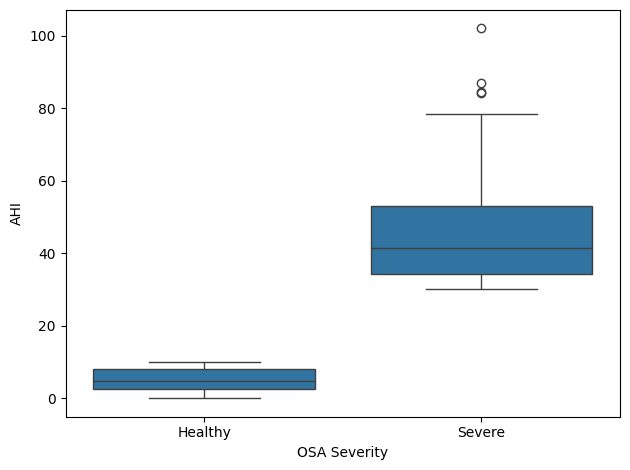

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="OSA", y="IAH", data=data)
plt.xlabel("OSA Severity")
plt.ylabel("AHI")
plt.tight_layout()
plt.savefig("plot_iah_box_by_class.png")
plt.show()


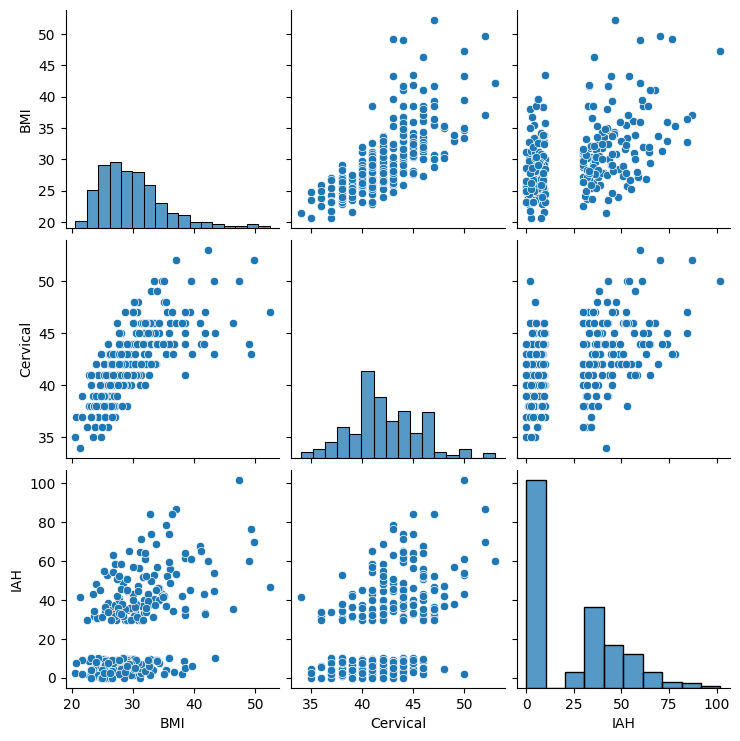

In [12]:
sns.pairplot(data[["BMI", "Cervical", "IAH"]])
plt.savefig("plot_pairplot_bmi_cervical_iah.png")
plt.show()

In [13]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Features and target (NO IAH in features!)
X = data[["Age", "Height", "Weight", "BMI", "Cervical"]]
y = data["IAH"]

cv = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "MAE": "neg_mean_absolute_error",
    "RMSE": "neg_root_mean_squared_error",
    "R2": "r2"
}

models = {
    "Linear Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]),
    "SVR (RBF)": Pipeline([
        ("scaler", StandardScaler()),
        ("model", SVR(kernel="rbf"))
    ]),
    "Random Forest": RandomForestRegressor(
        n_estimators=200,
        random_state=42
    )
}

results = {}

for name, model in models.items():
    cv_res = cross_validate(model, X, y, cv=cv, scoring=scoring)
    results[name] = {
        "MAE": -np.mean(cv_res["test_MAE"]),
        "RMSE": -np.mean(cv_res["test_RMSE"]),
        "R2": np.mean(cv_res["test_R2"])
    }

results


{'Linear Regression': {'MAE': np.float64(15.806658710939042),
  'RMSE': np.float64(19.084763408970485),
  'R2': np.float64(0.26150717591865763)},
 'SVR (RBF)': {'MAE': np.float64(16.276629120277928),
  'RMSE': np.float64(20.211342855134603),
  'R2': np.float64(0.17437338297946264)},
 'Random Forest': {'MAE': np.float64(15.425786668831169),
  'RMSE': np.float64(19.494289142035036),
  'R2': np.float64(0.22965786968494628)}}

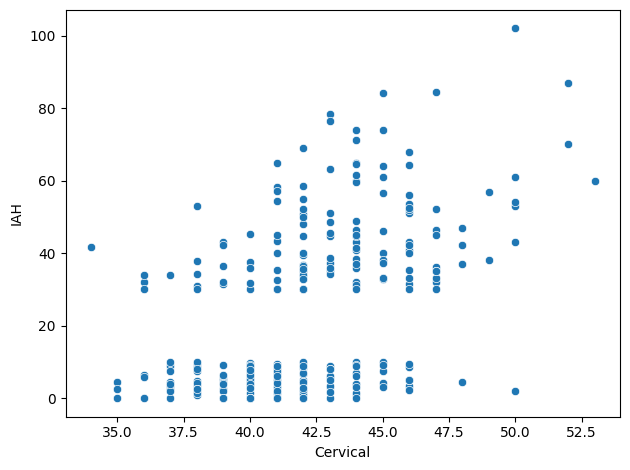

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="Cervical", y="IAH", data=data)
plt.tight_layout()
plt.savefig("plot_cervical_vs_iah.png")
plt.show()
